In [11]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
from statsbombpy import sb 
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-05-21T03:36:44.090970,2024-05-21T03:38:27.534702,2024-05-21T03:38:27.534702,2024-05-21T03:36:44.090970
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-28T18:02:23.493027,None,None,2024-02-28T18:02:23.493027
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-05-13T13:14:25.239651,2021-06-13T16:17:31.694,None,2024-05-13T13:14:25.239651
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
67,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
68,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
69,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
70,72,107,International,Women's World Cup,female,False,True,2023,2024-04-05T13:22:08.250209,2024-04-05T13:29:51.562450,2024-04-05T13:29:51.562450,2024-04-05T13:22:08.250209


In [3]:
 sb.events(match_id=18244)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Juventus,224,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Real Madrid,220,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Juventus,224,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Mario Lemina,3951.0,NaN,Juventus,224,00:32:07.282,Substitution,NaN
3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Marco Asensio Willemsen,5719.0,NaN,Real Madrid,220,00:36:59.944,Substitution,NaN
3397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Álvaro Borja Morata Martín,3477.0,NaN,Real Madrid,220,00:43:40.836,Substitution,NaN
3398,"{'outcome': {'id': 1, 'name': 'Lost'}}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:21:59.754,50/50,True


In [4]:
events = sb.events(match_id=18244)

In [19]:
events = pd.read_csv('../event/Generated_data/BayernLeverKusen.csv')

In [20]:
# events.to_csv("Real.csv")

In [21]:
events = events[['team','type','minute','location','shot_end_location','shot_outcome']]

In [22]:
shots= events[((events['team']=='Bayer Leverkusen')&(events['type']=='Shot'))].reset_index()

In [23]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome
0,132918,Bayer Leverkusen,Shot,7,"[114.6, 33.5]","[118.1, 35.7, 0.2]",Saved
1,132920,Bayer Leverkusen,Shot,13,"[113.9, 47.4]","[114.1, 46.8]",Blocked
2,132921,Bayer Leverkusen,Shot,16,"[89.2, 42.5]","[101.4, 41.3]",Blocked
3,132922,Bayer Leverkusen,Shot,16,"[110.2, 32.6]","[116.4, 38.1]",Wayward
4,132924,Bayer Leverkusen,Shot,24,"[108.0, 40.0]","[120.0, 42.9, 1.0]",Goal
...,...,...,...,...,...,...,...
618,133820,Bayer Leverkusen,Shot,47,"[110.6, 35.0]","[118.0, 36.6, 1.3]",Saved
619,133822,Bayer Leverkusen,Shot,56,"[93.9, 43.9]","[120.0, 45.0, 6.3]",Off T
620,133823,Bayer Leverkusen,Shot,63,"[104.8, 45.4]","[120.0, 38.2, 2.0]",Goal
621,133830,Bayer Leverkusen,Shot,86,"[98.6, 31.6]","[120.0, 34.9, 0.9]",Off T


In [26]:
import ast
# Convert string representation of list to actual list of integers
shots["location"] = shots["location"].apply(lambda loc: ast.literal_eval(loc))

# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


In [27]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome,X,Y,C,Distance,Angle,Goal
0,132918,Bayer Leverkusen,Shot,7,"[114.6, 33.5]","[118.1, 35.7, 0.2]",Saved,4.7250,22.780,18.020,18.629171,0.103293,0
1,132920,Bayer Leverkusen,Shot,13,"[113.9, 47.4]","[114.1, 46.8]",Blocked,5.3375,32.232,8.568,10.094530,0.415725,0
2,132921,Bayer Leverkusen,Shot,16,"[89.2, 42.5]","[101.4, 41.3]",Blocked,26.9500,28.900,11.900,29.460355,0.226885,0
3,132922,Bayer Leverkusen,Shot,16,"[110.2, 32.6]","[116.4, 38.1]",Wayward,8.5750,22.168,18.632,20.510535,0.152912,0
4,132924,Bayer Leverkusen,Shot,24,"[108.0, 40.0]","[120.0, 42.9, 1.0]",Goal,10.5000,27.200,13.600,17.181676,0.266257,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,133820,Bayer Leverkusen,Shot,47,"[110.6, 35.0]","[118.0, 36.6, 1.3]",Saved,8.2250,23.800,17.000,18.885196,0.173634,0
619,133822,Bayer Leverkusen,Shot,56,"[93.9, 43.9]","[120.0, 45.0, 6.3]",Off T,22.8375,29.852,10.948,25.326076,0.260156,0
620,133823,Bayer Leverkusen,Shot,63,"[104.8, 45.4]","[120.0, 38.2, 2.0]",Goal,13.3000,30.872,9.928,16.596843,0.355702,1
621,133830,Bayer Leverkusen,Shot,86,"[98.6, 31.6]","[120.0, 34.9, 0.9]",Off T,18.7250,21.488,19.312,26.899423,0.190658,0


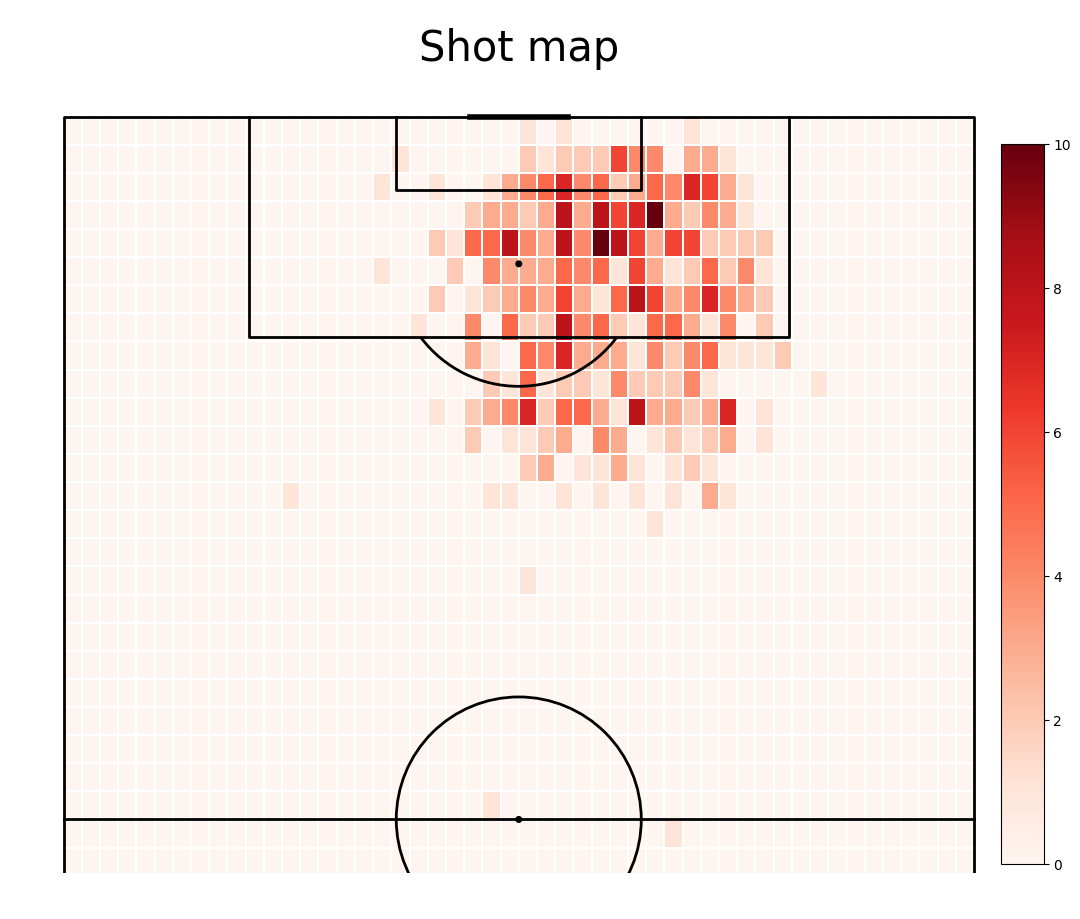

In [28]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#subtracting x from 105 but not y from 68 because of inverted Wyscout axis
#calculate number of shots in each bin
bin_statistic_shots = pitch.bin_statistic(105 - shots.X, shots.Y, bins=50)
#make heatmap
pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot map' , fontsize = 30)
plt.show()

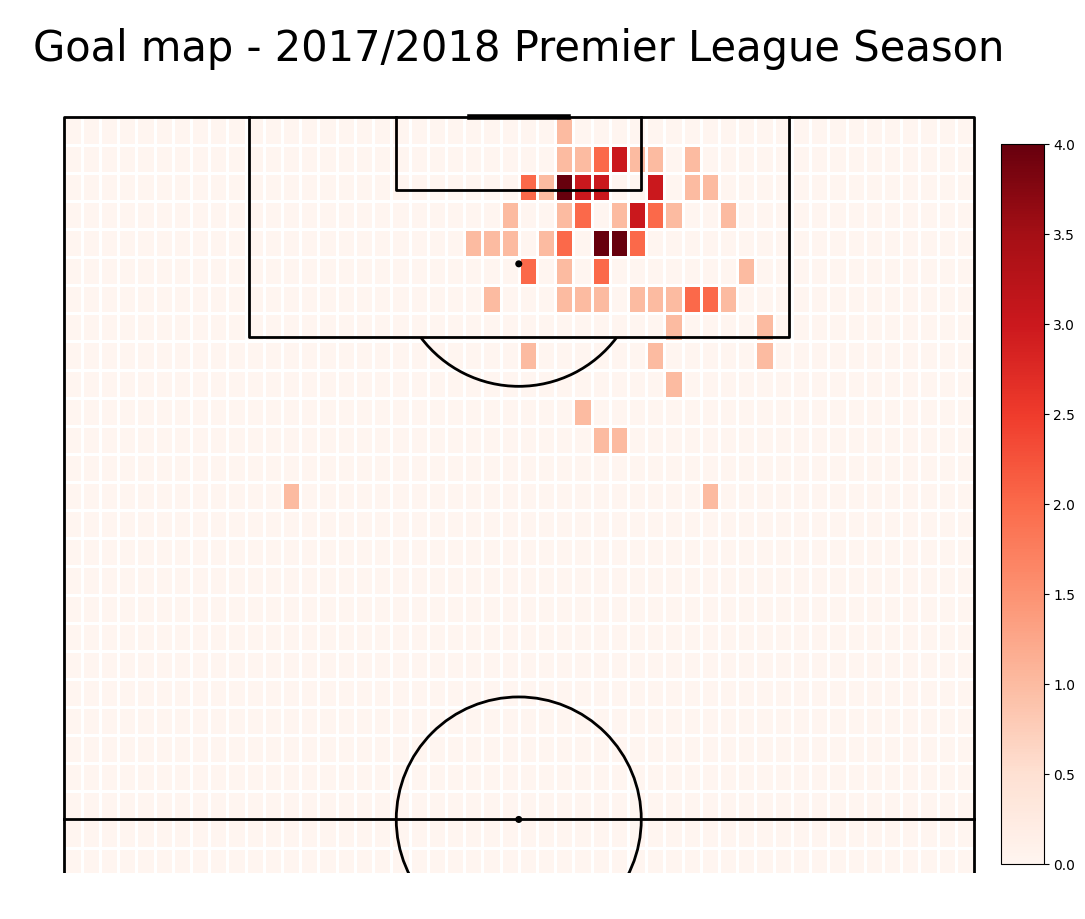

In [29]:
#take only goals
goals = shots.loc[shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map - 2017/2018 Premier League Season' , fontsize = 30)
plt.show()

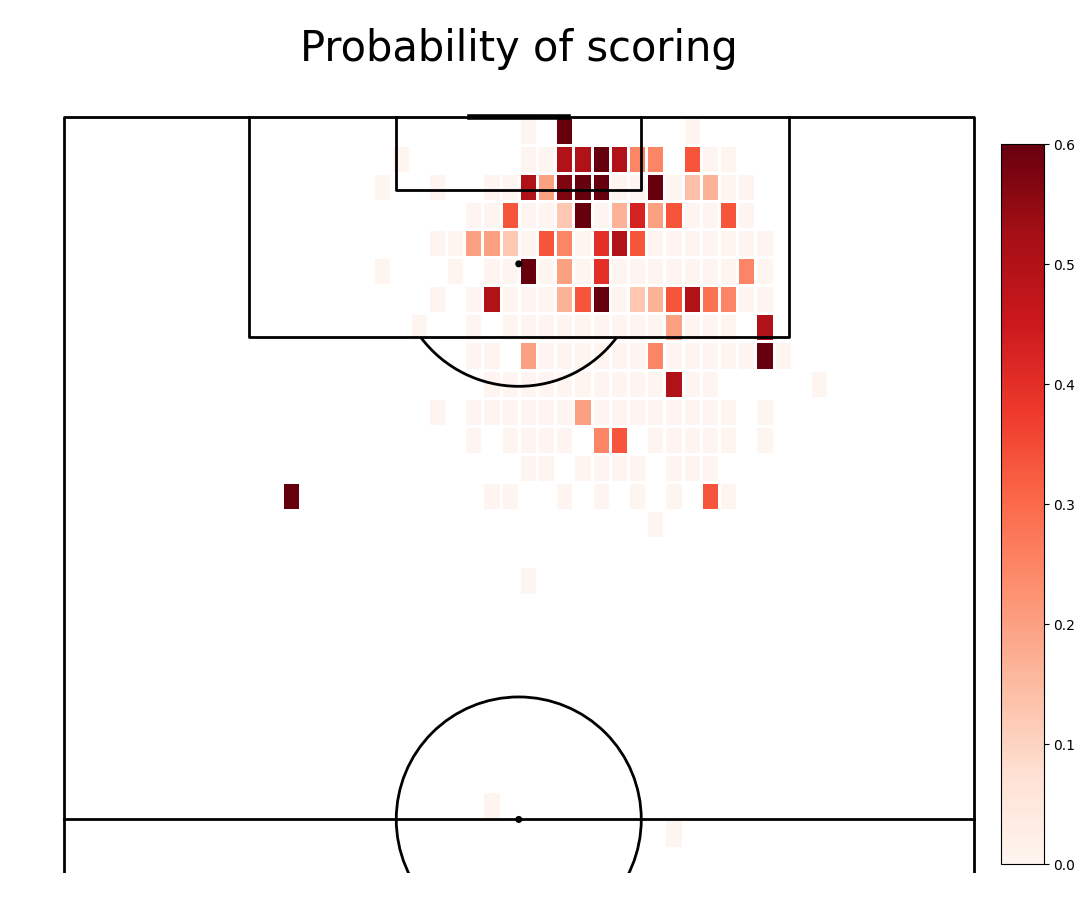

In [30]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

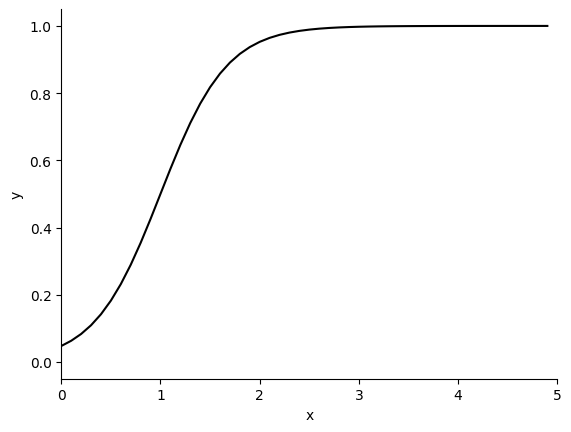

In [31]:
b = [3, -3]
x = np.arange(5, step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x))
fig,ax = plt.subplots()
plt.ylim((-0.05,1.05))
plt.xlim((0,5))
ax.set_ylabel('y')
ax.set_xlabel("x")
ax.plot(x, y, linestyle='solid', color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

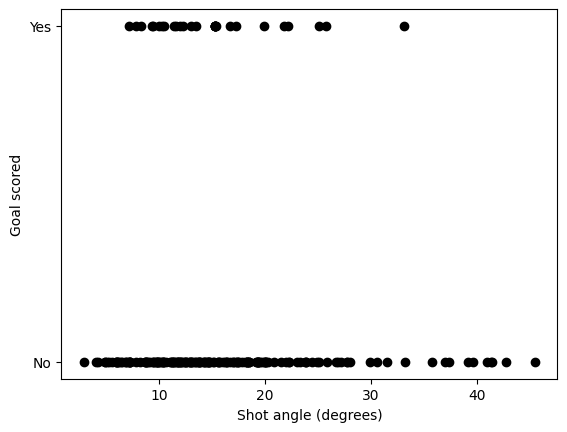

In [32]:
#first 200 shots
shots_200=shots.iloc[:200]
#plot first 200 shots goal angle
fig, ax = plt.subplots()
ax.plot(shots_200['Angle']*180/np.pi, shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

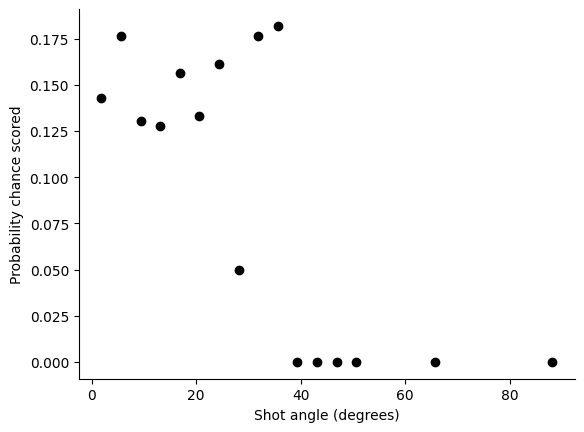

In [33]:
#number of shots from angle
shotcount_dist = np.histogram(shots['Angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['Angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

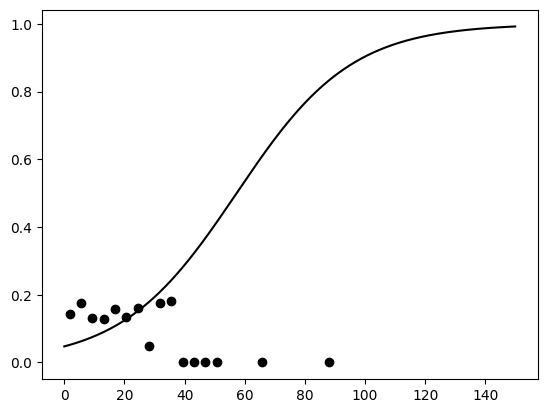

In [34]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
#plot line
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot logistic function
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

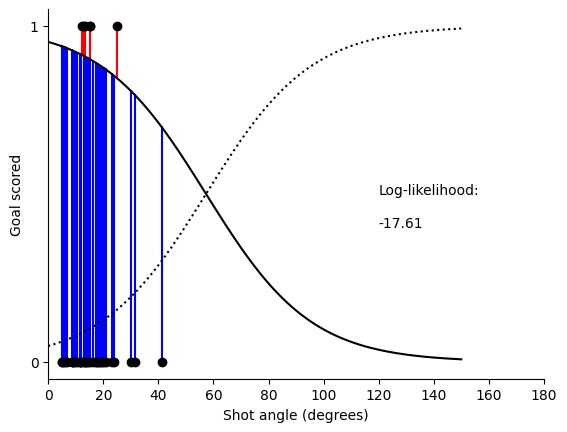

In [35]:
#calculate xG
xG = 1/(1+np.exp(b[0]+b[1]*shots['Angle']))
shots = shots.assign(xG = xG)
shots_40 = shots.iloc[:40]
fig, ax = plt.subplots()
#plot data
ax.plot(shots_40['Angle']*180/np.pi, shots_40['Goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
#plot curves
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
#calculate loglikelihood
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['Angle'] * 180/np.pi
    if shot['Goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['Goal'], 1-shot['xG']], color='blue', zorder = 1)
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  623
Model:                                GLM   Df Residuals:                      621
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -249.34
Date:                    Mon, 27 May 2024   Deviance:                       498.69
Time:                            10:18:17   Pearson chi2:                     622.
No. Iterations:                         5   Pseudo R-squ. (CS):           0.002321
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

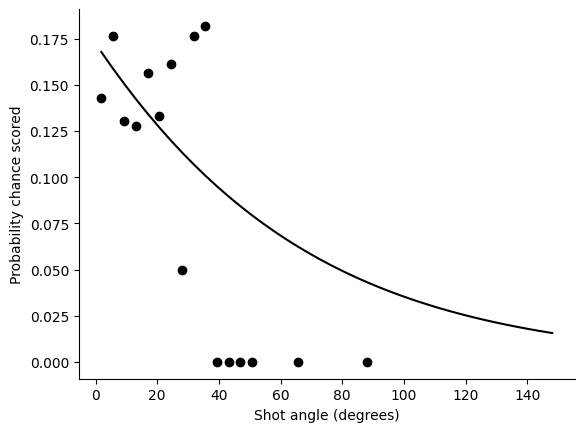

In [36]:
#create model
test_model = smf.glm(formula="Goal ~ Angle" , data=shots,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
#get params
b=test_model.params
#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))
fig, ax = plt.subplots()
#plot data
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot line
ax.plot(midangle, xGprob, linestyle='solid', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  623
Model:                                GLM   Df Residuals:                      621
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -240.80
Date:                    Mon, 27 May 2024   Deviance:                       481.60
Time:                            10:18:18   Pearson chi2:                     622.
No. Iterations:                         5   Pseudo R-squ. (CS):            0.02932
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

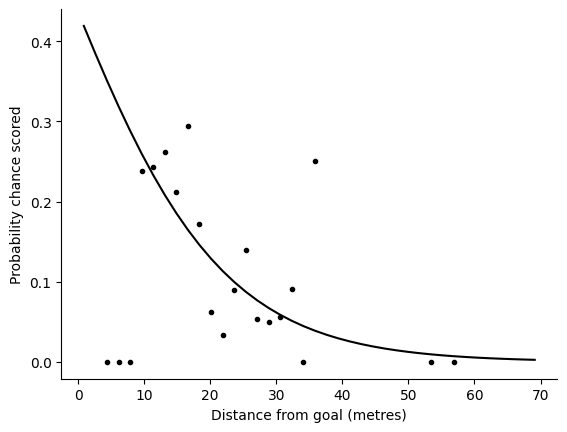

In [37]:
#number of shots
shotcount_dist = np.histogram(shots['Distance'],bins=40,range=[0, 70])
#number of goals
goalcount_dist = np.histogram(goals['Distance'],bins=40,range=[0, 70])
#empirical probability of scoring
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
#making a plot
fig, ax = plt.subplots()
#plotting data
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#making legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
#plot line
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  623
Model:                                GLM   Df Residuals:                      620
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -240.58
Date:                    Mon, 27 May 2024   Deviance:                       481.16
Time:                            10:18:20   Pearson chi2:                     640.
No. Iterations:                         6   Pseudo R-squ. (CS):            0.03000
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

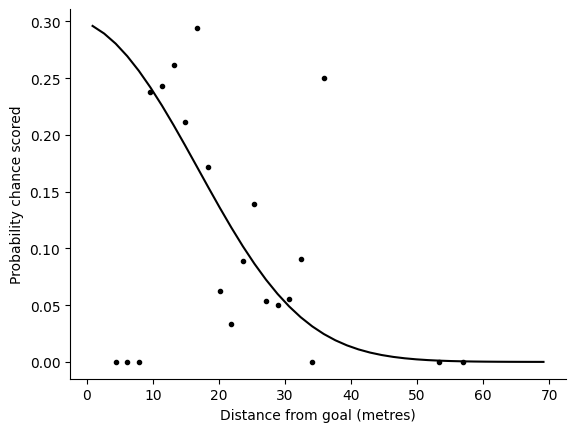

In [38]:
#calculating distance squared
shots["D2"] = shots['Distance']**2
#adding it to the model
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots,
                           family=sm.families.Binomial()).fit()
#print model summary
print(test_model.summary())
#get parameters
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
#plot line
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                  623
Model:                                GLM   Df Residuals:                      620
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -227.39
Date:                    Mon, 27 May 2024   Deviance:                       454.78
Time:                            10:18:20   Pearson chi2:                     680.
No. Iterations:                         6   Pseudo R-squ. (CS):            0.07021
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

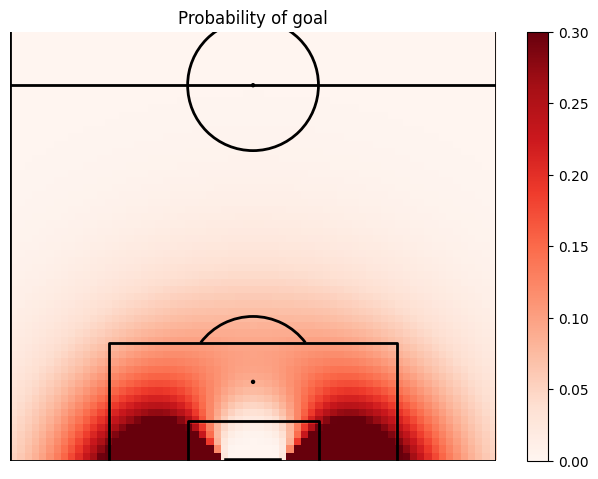

In [39]:
#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Mcfaddens Rsquared 0.09068254868274406


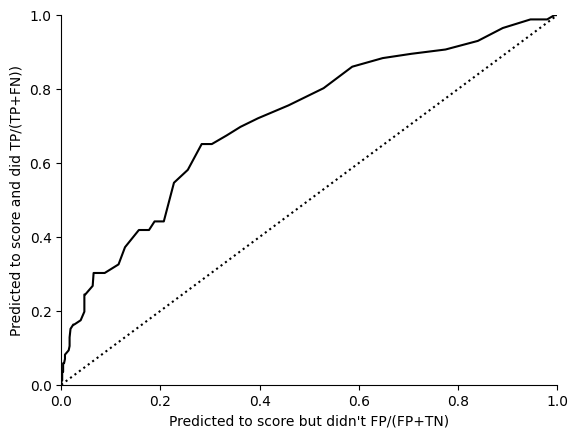

In [40]:
# Mcfaddens Rsquared for Logistic regression
null_model = smf.glm(formula="Goal ~ 1 ", data=shots,
                     family=sm.families.Binomial()).fit()
print("Mcfaddens Rsquared", 1 - test_model.llf / null_model.llf)

# ROC curve
numobs = 100
TP = np.zeros(numobs)
FP = np.zeros(numobs)
TN = np.zeros(numobs)
FN = np.zeros(numobs)

for i, threshold in enumerate(np.arange(0, 1, 1 / numobs)):
    for j, shot in shots.iterrows():
        if (shot['Goal'] == 1):
            if (shot['xG'] > threshold):
                TP[i] = TP[i] + 1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal'] == 0):
            if (shot['xG'] > threshold):
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1

fig, ax = plt.subplots()
ax.plot(FP / (FP + TN), TP / (TP + FN), color='black')
ax.plot([0, 1], [0, 1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN))")
ax.set_xlabel("Predicted to score but didn't FP/(FP+TN)")
plt.ylim((0.00, 1.00))
plt.xlim((0.00, 1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [41]:
shots['xG']=xG

In [42]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome,X,Y,C,Distance,Angle,Goal,xG,D2,X2,C2,AX
0,132918,Bayer Leverkusen,Shot,7,"[114.6, 33.5]","[118.1, 35.7, 0.2]",Saved,4.7250,22.780,18.020,18.629171,0.103293,0,0.287896,347.046025,22.325625,324.720400,0.488062
1,132920,Bayer Leverkusen,Shot,13,"[113.9, 47.4]","[114.1, 46.8]",Blocked,5.3375,32.232,8.568,10.094530,0.415725,0,0.259413,101.899530,28.488906,73.410624,2.218933
2,132921,Bayer Leverkusen,Shot,16,"[89.2, 42.5]","[101.4, 41.3]",Blocked,26.9500,28.900,11.900,29.460355,0.226885,0,0.031244,867.912500,726.302500,141.610000,6.114558
3,132922,Bayer Leverkusen,Shot,16,"[110.2, 32.6]","[116.4, 38.1]",Wayward,8.5750,22.168,18.632,20.510535,0.152912,0,0.183690,420.682049,73.530625,347.151424,1.311221
4,132924,Bayer Leverkusen,Shot,24,"[108.0, 40.0]","[120.0, 42.9, 1.0]",Goal,10.5000,27.200,13.600,17.181676,0.266257,1,0.181965,295.210000,110.250000,184.960000,2.795699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,133820,Bayer Leverkusen,Shot,47,"[110.6, 35.0]","[118.0, 36.6, 1.3]",Saved,8.2250,23.800,17.000,18.885196,0.173634,0,0.211358,356.650625,67.650625,289.000000,1.428139
619,133822,Bayer Leverkusen,Shot,56,"[93.9, 43.9]","[120.0, 45.0, 6.3]",Off T,22.8375,29.852,10.948,25.326076,0.260156,0,0.052736,641.410110,521.551406,119.858704,5.941320
620,133823,Bayer Leverkusen,Shot,63,"[104.8, 45.4]","[120.0, 38.2, 2.0]",Goal,13.3000,30.872,9.928,16.596843,0.355702,1,0.133832,275.455184,176.890000,98.565184,4.730831
621,133830,Bayer Leverkusen,Shot,86,"[98.6, 31.6]","[120.0, 34.9, 0.9]",Off T,18.7250,21.488,19.312,26.899423,0.190658,0,0.057334,723.578969,350.625625,372.953344,3.570071


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                   18
Model:                                GLM   Df Residuals:                       15
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -8.1831
Date:                    Mon, 27 May 2024   Deviance:                       16.366
Time:                            10:19:11   Pearson chi2:                     22.3
No. Iterations:                         5   Pseudo R-squ. (CS):             0.1394
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

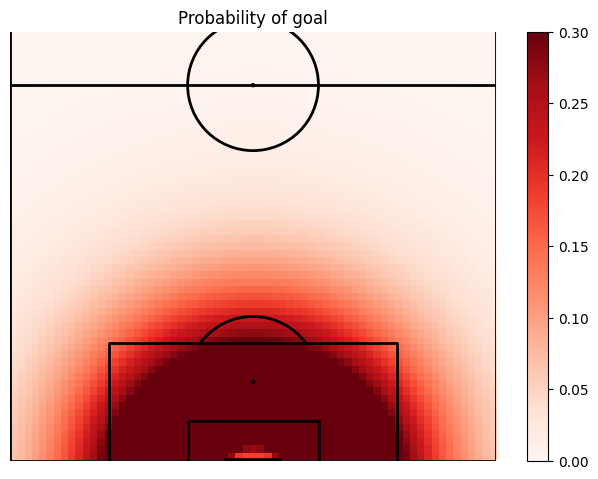

In [44]:
a = sb.events(match_id=18244)
a = a[['team','type','minute','location','shot_end_location','shot_outcome']]
shots= a[((a['team']=='Real Madrid')&(a['type']=='Shot'))].reset_index()
# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

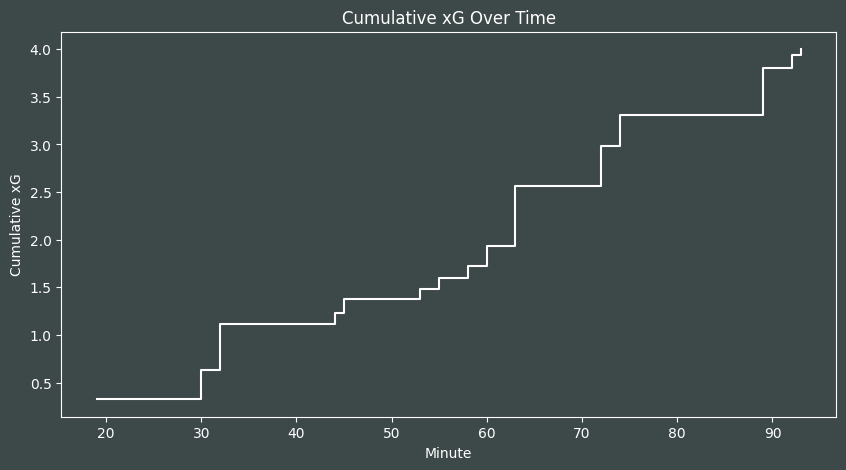

In [45]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
from statsbombpy import sb 
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

a = sb.events(match_id=18244)
a = a[['team','type','minute','location','shot_end_location','shot_outcome']]
shots= a[((a['team']=='Real Madrid')&(a['type']=='Shot'))].reset_index()
# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
# print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

# #Create a 2D map of xG
# pgoal_2d=np.zeros((68,68))
# for x in range(68):
#     for y in range(68):
#         sh=dict()
#         a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
#         if a<0:
#             a = np.pi + a
#         sh['Angle'] = a
#         sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
#         sh['D2'] = x**2 + abs(y-68/2)**2
#         sh['X'] = x
#         sh['AX'] = x*a
#         sh['X2'] = x**2
#         sh['C'] = abs(y-68/2)
#         sh['C2'] = (y-68/2)**2

#         pgoal_2d[x,y] =  calculate_xG(sh)

# Calculate the cumulative sum of the 'xG' column
shots['cumulative_xG'] = shots['xG'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

# Plot cumulative xG using a step plot
ax.step(x=shots['minute'], y=shots['cumulative_xG'], where='post', color='white')

# Customize the plot appearance
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set labels and title
ax.set_xlabel('Minute', color='white')
ax.set_ylabel('Cumulative xG', color='white')
ax.set_title('Cumulative xG Over Time', color='white')

# Show the plot
plt.show()

In [86]:
df = pd.read_csv("../event/Generated_data/match.csv")
df = df.drop("Unnamed: 0",axis=1)

In [87]:
def calculate_xG(sh, b, model_variables):
    bsum = b[0]
    for i, v in enumerate(model_variables):
        bsum += b[i + 1] * sh[v]
    xG = 1 / (1 + np.exp(-bsum))
    return xG

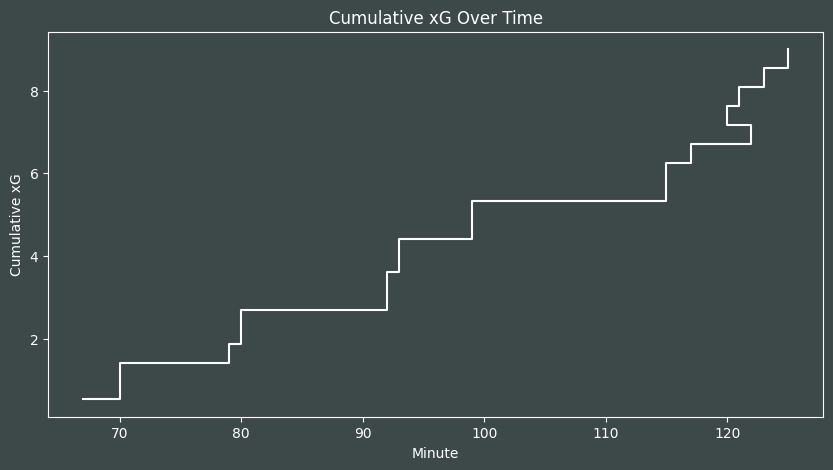

In [88]:
import ast

df = df[['team','type','minute','location','shot_end_location','shot_outcome']]
shots= df[((df['team']=='France')&(df['type']=='Shot'))].reset_index()
shots['location'] = shots['location'].apply(ast.literal_eval)

# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)

#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
# print(test_model.summary())
b=test_model.params
# #add an xG to my dataframe
xG = shots.apply(calculate_xG, args=(b, model_variables), axis=1)
shots = shots.assign(xG=xG)

# Calculate the cumulative sum of the 'xG' column
shots['cumulative_xG'] = shots['xG'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

# Plot cumulative xG using a step plot
ax.step(x=shots['minute'], y=shots['cumulative_xG'], where='post', color='white')

# Customize the plot appearance
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set labels and title
ax.set_xlabel('Minute', color='white')
ax.set_ylabel('Cumulative xG', color='white')
ax.set_title('Cumulative xG Over Time', color='white')

# Show the plot
plt.show()

In [82]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome,X,Y,C,Distance,Angle,Goal,X2,C2,AX,xG
0,4216,France,Shot,67,"[113.4, 34.6]","[120.0, 31.5, 1.1]",Off T,5.7750,23.528,17.272,18.211881,0.132045,0,33.350625,298.321984,0.762562,0.540842
1,4217,France,Shot,70,"[102.5, 27.9]","[120.0, 38.8, 4.5]",Off T,15.3125,18.972,21.828,26.663350,0.159328,0,234.472656,476.461584,2.439710,0.882670
2,4219,France,Shot,79,"[108.0, 40.0]","[120.0, 37.3, 0.3]",Goal,10.5000,27.200,13.600,17.181676,0.266257,1,110.250000,184.960000,2.795699,0.461442
3,4220,France,Shot,80,"[104.8, 30.1]","[120.0, 41.5, 0.3]",Goal,13.3000,20.468,20.332,24.295683,0.167186,1,176.890000,413.390224,2.223578,0.815793
4,4222,France,Shot,92,"[95.9, 32.2]","[100.7, 33.5]",Blocked,21.0875,21.896,18.904,28.320379,0.193284,0,444.682656,357.361216,4.075886,0.913909
5,4223,France,Shot,93,"[108.9, 28.5]","[118.0, 36.6, 0.2]",Saved,9.7125,19.380,21.420,23.519121,0.130965,0,94.332656,458.816400,1.271993,0.792546
6,4226,France,Shot,99,"[89.8, 39.9]","[103.3, 40.4]",Blocked,26.4250,27.132,13.668,29.750544,0.218363,0,698.280625,186.814224,5.770239,0.934769
7,4233,France,Shot,115,"[101.4, 26.6]","[104.5, 29.1]",Blocked,16.2750,18.088,22.712,27.941198,0.154030,0,264.875625,515.834944,2.506835,0.909260
8,4234,France,Shot,117,"[108.0, 40.0]","[120.0, 36.7, 1.1]",Goal,10.5000,27.200,13.600,17.181676,0.266257,1,110.250000,184.960000,2.795699,0.461442
9,4235,France,Shot,122,"[103.7, 45.1]","[109.7, 44.1, 0.5]",Saved,14.2625,30.668,10.132,17.495037,0.342638,0,203.418906,102.657424,4.886875,0.465968
